# **Lennard-Jones gas**

In this code we simulate ...

**Credits**
* Juan Andrés Guarín Rojas
* [GitHub](https://github.com/AndresGuarin)

# **Import libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ECond.simulation as sm
import ECond.simulation.solver as solver
import ECond.simulation.animation as ani

from datetime import datetime
from ECond.simulation.mesh import super_concatenate

# **1. Show some structures**

In [2]:
def uniques(X0,Y0):
    Pos = []
    for i in range(len(X0)):
        Pos.append([X0[i],Y0[i]])
    Pos = np.array(Pos)
    Pos = np.unique(Pos,axis=0)
    return Pos[:,0], Pos[:,1]

In [4]:
def middles(Ntest:int,mode:str,XC:np.ndarray,YC:np.ndarray,P:list,nrows:int,a:int,ncols:int=None,B:int=None,seed:int=None) -> tuple:
    """
        This functions return random positions X0 and Y0 for the free electrons 
        of the conductor.

        @params
            Ntest: int. lenght of the random array.
            mode: ['hex', 'rec']. 'hex' is for hexagonal-like tights. 'rec' is for rectangular-like tights.
            XC: array-like. X-positions of the positive cores.
            YC: array-like. Y-positions of the positive cores.
            P: list. It contains the initial position of lower-left conner the grid.
            nrows: int. Number of rows of the grid.
            ncols: int. Number of columns of the grid. It is requiered if mode='rec'
            a: float. Lattice constant. Is the vertical distance between near cores.
            B: float. Is the vertical distance between near cores in a rectangular mesh. It is requiered if mode='rec'
            seed: int. Is the seed for random.seed() function. It is optional.
    """
    
    if seed != None: np.random.seed(seed)
    if mode=='hex': #for hexagonal-like mesh
        A = np.random.randint(0,len(XC),Ntest)
        X0, Y0 = XC[A], YC[A]+a/2
        ii=Y0<=(nrows-1)*a + P[1]
        X0, Y0 = uniques(X0[ii],Y0[ii])
    elif mode=='rec': #for rectangular-like mesh
        if B==None: B=a
        A = np.random.randint(0,len(XC),Ntest)
        X0, Y0 = XC[A]+B/2, YC[A]+a/2
        ii=Y0<=(nrows-1)*a + P[1]
        X0, Y0 = X0[ii],Y0[ii]
        jj=X0<=(ncols-1)*B + P[0]
        X0, Y0 = uniques(X0[jj],Y0[jj])
    return X0,Y0

In [9]:
def middlesAll(mode:str,XC:np.ndarray,YC:np.ndarray,P:list,nrows:int,a:int,ncols:int=None,B:int=None,seed:int=None) -> tuple:
    """
        This functions return random positions X0 and Y0 for the free electrons 
        of the conductor.

        @params
            mode: ['hex', 'rec']. 'hex' is for hexagonal-like tights. 'rec' is for rectangular-like tights.
            XC: array-like. X-positions of the positive cores.
            YC: array-like. Y-positions of the positive cores.
            P: list. It contains the initial position of lower-left conner the grid.
            nrows: int. Number of rows of the grid.
            ncols: int. Number of columns of the grid. It is requiered if mode='rec'
            a: float. Lattice constant. Is the vertical distance between near cores.
            B: float. Is the vertical distance between near cores in a rectangular mesh. It is requiered if mode='rec'
            seed: int. Is the seed for random.seed() function. It is optional.
    """
    if mode=='hex': #for hexagonal-like mesh
        X0, Y0 = XC, YC+a/2
        ii=Y0<=(nrows-1)*a + P[1]
        X0, Y0 = X0[ii],Y0[ii]
    elif mode=='rec': #for rectangular-like mesh
        if B==None: B=a
        X0, Y0 = XC+B/2, YC+a/2
        ii=Y0<=(nrows-1)*a + P[1]
        X0, Y0 = X0[ii],Y0[ii]
        jj=X0<=(ncols-1)*B + P[0]
        X0, Y0 = X0[jj],Y0[jj]
    return X0,Y0

9

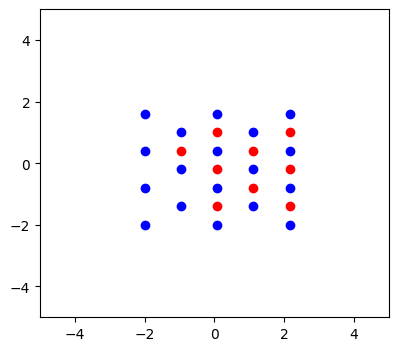

In [4]:
# Parameters
P = [-2,-2]; nrows=4; ncols=5; a=1.2; coef=1
XC, YC = sm.mesh.hexagonal(P=P,nrows=nrows,ncols=ncols,a=a,coef=coef)
X0, Y0 = middles(Ntest=15,mode='hex',XC=XC,YC=YC,P=P,nrows=nrows,a=a,seed=1515)
Np = len(X0)

display(Np)

%matplotlib inline
plt.figure(figsize=(4.5,4))
plt.plot(XC,YC,'ob')
plt.plot(X0,Y0,'or')
D = 5; plt.xlim(-D,D); plt.ylim(-D,D)
plt.show()

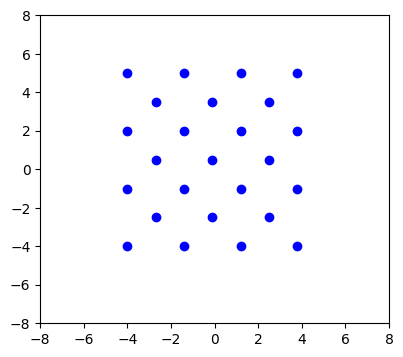

In [5]:
XC, YC = sm.mesh.x_squared(P=[-4,-4],nrows=4,ncols=4,a=3)

%matplotlib inline
plt.figure(figsize=(4.5,4))
plt.plot(XC,YC,'ob')
D = 8; plt.xlim(-D,D); plt.ylim(-D,D)
plt.show()

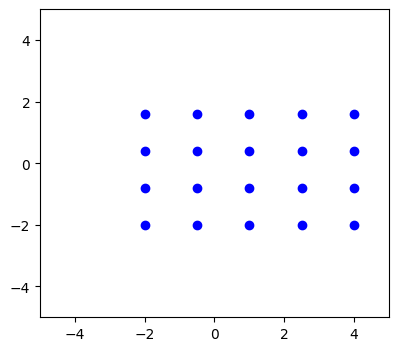

In [6]:
XC, YC = sm.mesh.rectangular(P=[-2,-2],nrows=4,ncols=5,a=1.2,b=1.5)
%matplotlib inline
plt.figure(figsize=(4.5,4))
plt.plot(XC,YC,'ob')
D = 5; plt.xlim(-D,D); plt.ylim(-D,D)
plt.show()

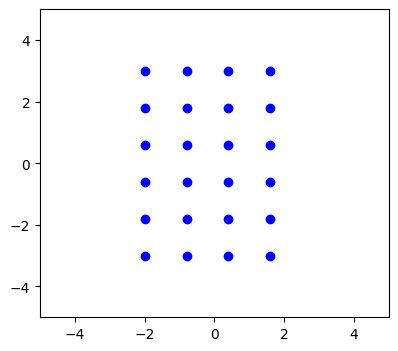

In [7]:
XC, YC = sm.mesh.squared(P=[-2,-3],nrows=6,ncols=4,a=1.2)
%matplotlib inline
plt.figure(figsize=(4.5,4))
plt.plot(XC,YC,'ob')
D = 5; plt.xlim(-D,D); plt.ylim(-D,D)
plt.show()

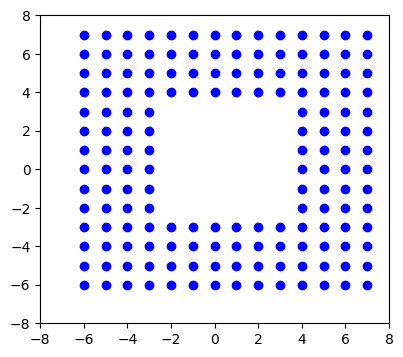

In [8]:
XC, YC = super_concatenate([sm.mesh.squared(P=[-6,-6],nrows=14,ncols=4,a=1),
                            sm.mesh.squared(P=[-2,-6],nrows=4,ncols=6,a=1),
                            sm.mesh.squared(P=[4,-6],nrows=14,ncols=4,a=1),
                            sm.mesh.squared(P=[-2,4],nrows=4,ncols=6,a=1)
                            ])

%matplotlib inline
plt.figure(figsize=(4.5,4))
plt.plot(XC,YC,'ob')
D = 8; plt.xlim(-D,D); plt.ylim(-D,D)
plt.show()

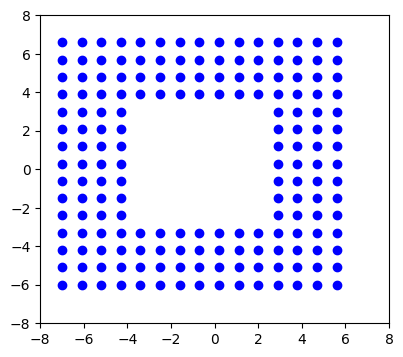

In [9]:
XC, YC = sm.structures.squared_wire(P=[-7,-6],a=0.9,d=4,w=15,h=15)

%matplotlib inline
plt.figure(figsize=(4.5,4))
plt.plot(XC,YC,'ob')
D = 8; plt.xlim(-D,D); plt.ylim(-D,D)
plt.show()

# **2. Test some structures**

## **2.1 Check simualtion**

41

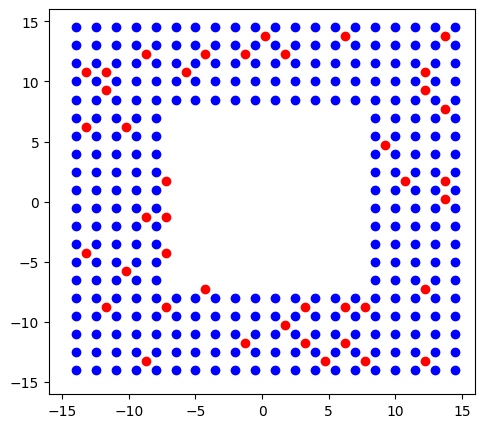

In [11]:
a = 1.5
P = [-14,-14]
XC, YC = sm.structures.squared_wire(P=P,a=a,d=5,w=20,h=20)
X0, Y0 = middles(50,'rec',XC,YC,P,20,a,20,a,6645)

Np = len(X0)
display(Np)

%matplotlib inline
plt.figure(figsize=(5.5,5))
plt.plot(XC,YC,'ob')
plt.plot(X0,Y0,'or')
D = 16; plt.xlim(-D,D); plt.ylim(-D,D)
plt.show()

In [18]:
# Choose parameters 
#h = 0.01; N = 2000; R0=0.25; n=5; V0=0.5
h = 0.01; N = 2000; R0=0.2; n=6; V0=1.5

#nuclei
QC = np.ones(len(XC))

#free charges
Q = -np.ones(Np)
Vx0 = np.random.uniform(-1,1,Np)*V0
Vy0 = np.random.uniform(-1,1,Np)*V0

# Set external fields
def B0(X,Y,t): return X*0 #In order: [Bz]

def E0(X,Y,t): return [X*0, X*0] #In order: [Ex, Ey]
def E1(X,Y,t): return [X*0, (X>=-15)*(X<=-5)*(Y>=-5)*(Y<=5)*(-1)]

sim = solver.ECond(h,N,Np,E1,B0,R0,n)
s = sim.simulate([X0,Y0,Vx0,Vy0,Q,XC,YC,QC])

self1 = sim.get_self()

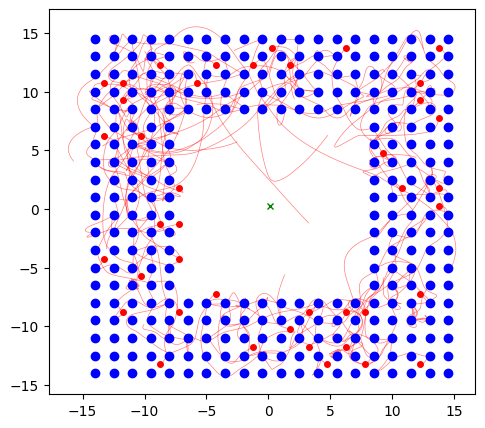

In [19]:
%matplotlib inline

plt.figure(figsize=(5.5,5))
for i in range(Np):
    X = s[0][:,i]
    Y = s[1][:,i]
    plt.plot(X,Y,'-r',lw=0.5,alpha=0.5)
    plt.plot(X[0],Y[0],'or',ms=4)
plt.plot(XC,YC,'ob')
plt.plot(np.mean(X0),np.mean(Y0),'xg',ms=5)
#D=5; plt.xlim(-D,D); plt.ylim(-D,D)
plt.show()

In [20]:
np.mean(np.sqrt(Vx0**2+Vy0**2)), np.mean(np.sqrt(s[2][:,-1]**2+s[3][:,-1]**2))

(1.1791977438707357, 1.3440446218281146)

In [21]:
# Dynamic animation

%matplotlib auto
%matplotlib auto

ani.animate_path(self1,s,kind=0,save=False,name='test.mp4',verbose=True,plot_params=['-r','or',0.2,5,0.5],length=8,interval=0,dj=5,j0=3)

Using matplotlib backend: QtAgg
Using matplotlib backend: QtAgg


In [24]:
#Density of electrons animation 2

%matplotlib auto
%matplotlib auto

ani.animate_path(self1,s,kind=2,save=False,name='test.mp4',verbose=False,plot_params=['-r','or',20,15,0.004],length=8,interval=0,dj=5,j0=3)

Using matplotlib backend: QtAgg
Using matplotlib backend: QtAgg


## **2.2 Electric Current simulation**

11

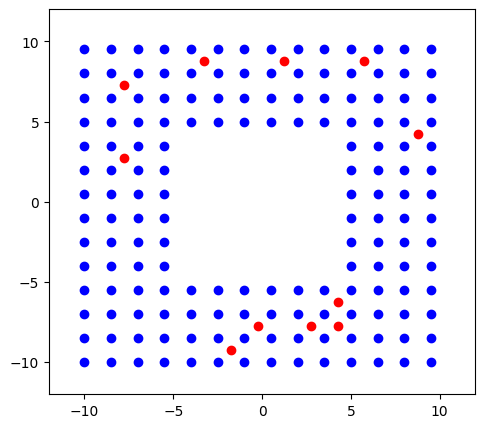

In [68]:
a = 1.5; P = [-10,-10]; d=4; w=14; h=14
XC, YC = sm.structures.squared_wire(P=P,a=a,d=d,w=w,h=h)
X0, Y0 = middles(Ntest=15,mode='rec',XC=XC,YC=YC,P=P,nrows=h,a=a,ncols=w,B=a,seed=59)
#X0, Y0 = middlesAll(mode='rec',XC=XC,YC=YC,P=P,nrows=h,a=a,ncols=w,B=a,seed=587)

Np = len(X0)
display(Np)

%matplotlib inline
plt.figure(figsize=(5.5,5))
plt.plot(XC,YC,'ob')
plt.plot(X0,Y0,'or')
D = 12; plt.xlim(-D,D); plt.ylim(-D,D)
plt.show()

In [63]:
len(XC), len(X0)

(160, 31)

In [69]:
# Choose parameters 
#h = 0.01; N = 2000; R0=0.25; n=5; V0=0.5
h = 0.01; N = 6000; R0=0.6; n=3; V0=0.4

#nuclei
QC = np.ones(len(XC))

#free charges
Q = -np.ones(Np)
np.random.seed(919)
Vx0 = np.random.uniform(-1,1,Np)*V0
Vy0 = np.random.uniform(-1,1,Np)*V0

# Set external fields
def bbox(X,Y,x0,x1,y0,y1):
    return (X>=x0)*(X<=x1)*(Y>=y0)*(Y<=y1)

def B0(X,Y,t): return X*0 #In order: [Bz]

def E0(X,Y,t): return [X*0, X*0] #In order: [Ex, Ey]
Emag = 0.1
def E1(X,Y,t): return [(bbox(X,Y,-10,5,5,10)*(-1.0) + bbox(X,Y,-5,10,-10,-5)*(1.0))*Emag,
                       (bbox(X,Y,-10,-5,-10,5)*(-1.0) + bbox(X,Y,5,10,-5,10)*(1.0))*Emag]

sim = solver.ECond(h,N,Np,E1,B0,R0,n)
s = sim.simulate([X0,Y0,Vx0,Vy0,Q,XC,YC,QC])

self1 = sim.get_self()

In [70]:
%matplotlib auto
%matplotlib auto

ani.animate_path(self1,s,kind=0,save=False,name='test.mp4',verbose=True,plot_params=['-r','or',0.2,5,0.5],
                 length=8,interval=50,dj=10,j0=1,L=12,ltraj=500)

Using matplotlib backend: QtAgg
Using matplotlib backend: QtAgg


In [58]:
plt.plot(XC,YC,'ob')
plt.grid(True)

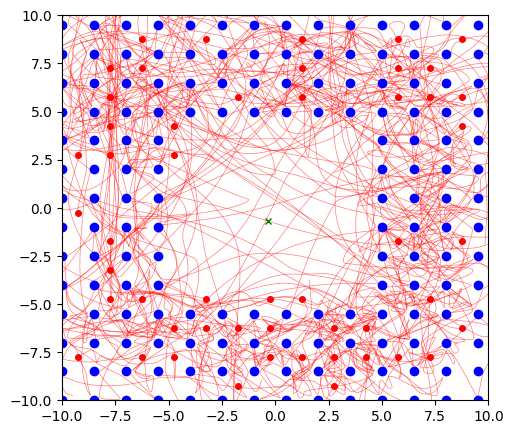

In [56]:
%matplotlib inline

plt.figure(figsize=(5.5,5))
for i in range(Np):
    X = s[0][:,i]
    Y = s[1][:,i]
    plt.plot(X,Y,'-r',lw=0.5,alpha=0.5)
    plt.plot(X[0],Y[0],'or',ms=4)
plt.plot(XC,YC,'ob')
plt.plot(np.mean(X0),np.mean(Y0),'xg',ms=5)
D=10; plt.xlim(-D,D); plt.ylim(-D,D)
plt.show()

In [29]:
np.mean(np.sqrt(Vx0**2+Vy0**2)), np.mean(np.sqrt(s[2][:,-1]**2+s[3][:,-1]**2))

(0.2715954518611364, 0.9092045135770702)

In [14]:
# Dynamic animation

%matplotlib auto
%matplotlib auto

ani.animate_path(self1,s,kind=0,save=False,name='test.mp4',verbose=True,plot_params=['-r','or',0.2,5,0.5],length=8,interval=10,dj=5,j0=3,L=12)

Using matplotlib backend: QtAgg
Using matplotlib backend: QtAgg


In [23]:
#Density of electrons animation 2

%matplotlib auto
%matplotlib auto

ani.animate_path(self1,s,kind=2,save=False,name='test.mp4',verbose=False,plot_params=['-r','or',20,15,0.004],length=8,interval=0,dj=5,j0=3,L=12)

Using matplotlib backend: QtAgg
Using matplotlib backend: QtAgg
